In [1]:
%matplotlib widget

# Example of rigid-rotor calculations for water molecule

Simulation of the Stark effect, using dipole and polarizability interactions

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants

from richmol import RotStates, CartTensor, DIP_X_FIELD_INVCM, POL_X_FIELD2_INVCM

Using equilibrium geometry of the molecule and molecular-frame dipole and polarizability tensors, compute rotational energies and rotational matrix elements of the tensors in the laboratory frame.

In [3]:
xyz = (
    "bohr",
    "O", 0.00000000, 0.00000000, 0.12395915,
    "H", 0.00000000, -1.43102686, -0.98366080,
    "H", 0.00000000,  1.43102686, -0.98366080,
)

# rotational states
jmax = 10
states = RotStates.from_geometry(jmax, xyz)

# molecular-frame dipole moment in au
dip_mol = [0, 0, -0.7288]

# molecular-frame polarizability in au
pol_mol = [[9.1369, 0, 0], [0, 9.8701, 0], [0, 0, 9.4486]]

# rotational matrix elements of laboratory-frame
# dipole and polarizability tensors
dip_lab = CartTensor(states, dip_mol)
pol_lab = CartTensor(states, pol_mol)


Compute rigid-rotor solutions using molecular geometry as input
Cartesian units: bohr, conversion to Angstrom: 0.529177210544
  Atom           Mass (u)              X (Å)              Y (Å)              Z (Å)
     O    15.994914619260     0.000000000000     0.000000000000     0.065596357218
     H     1.007825031898     0.000000000000    -0.757266801988    -0.520530878265
     H     1.007825031898     0.000000000000     0.757266801988    -0.520530878265
Symmetry group: c1
solve for J = 0 and symmetry A ...
solve for J = 1 and symmetry A ...
solve for J = 2 and symmetry A ...
solve for J = 3 and symmetry A ...
solve for J = 4 and symmetry A ...
solve for J = 5 and symmetry A ...
solve for J = 6 and symmetry A ...
solve for J = 7 and symmetry A ...
solve for J = 8 and symmetry A ...
solve for J = 9 and symmetry A ...
solve for J = 10 and symmetry A ...
  J Irrep    i         Energy (E)      (J,k,tau,Irrep)     c_max²
  0     A    0         0.00000000       (0, 0, 0, 'A')    1.00000
  1 

Build and diagonalize Stark Hamiltonian

$$
H_\text{Stark} = H_\text{rig-rot} - \sum_{A=X,Y,Z}\mu_A F_A - \frac{1}{2}\sum_{A,B=X,Y,Z}\alpha_{A,B}F_AF_B
$$

In [4]:
# grid of field values ranging 1-100 MV/m
field_au = constants.value("atomic unit of electric field")
fz_grid = np.linspace(1, 1e6 * 100, 10) / field_au  # field in a.u.

# H_{rig-rot}
h0 = states.mat()  # in cm^-1

print(f"size of Hamiltonian:", h0.shape)

enr = []
for fz in fz_grid:
    field = np.array([0, 0, fz])
    print(f"compute for field = {field}")

    hdip = dip_lab.mat_field(field).toarray() * DIP_X_FIELD_INVCM
    hpol = pol_lab.mat_field(field).toarray() * POL_X_FIELD2_INVCM

    # H_{Stark}
    h = h0 - hdip - 0.5 * hpol

    e, v = np.linalg.eigh(h)
    enr.append(e)
enr = np.array(enr)

size of Hamiltonian: (1771, 1771)
compute for field = [0.00000000e+00 0.00000000e+00 1.94469038e-12]
compute for field = [0.00000000e+00 0.00000000e+00 2.16076726e-05]
compute for field = [0.00000000e+00 0.00000000e+00 4.32153433e-05]
compute for field = [0.0000000e+00 0.0000000e+00 6.4823014e-05]
compute for field = [0.00000000e+00 0.00000000e+00 8.64306846e-05]
compute for field = [0.         0.         0.00010804]
compute for field = [0.         0.         0.00012965]
compute for field = [0.         0.         0.00015125]
compute for field = [0.         0.         0.00017286]
compute for field = [0.         0.         0.00019447]


Plot Stark energies

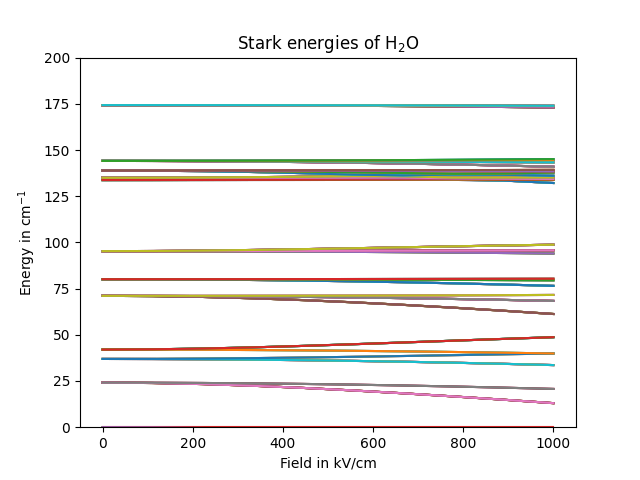

In [10]:
plt.plot(fz_grid * field_au / 100 / 1000, enr)
plt.title("Stark energies of H$_2$O")
plt.xlabel("Field in kV/cm")
plt.ylabel("Energy in ${\\rm cm}^{-1}$")
plt.ylim([0, 200])
plt.show()